## Import libraries

In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

## Load data

In [2]:
path="C:\\Users.........."

## Heat map

In [19]:
df=pd.read_excel(path+"data heat map.xlsx")

In [20]:
df.head()

Date         KPI   var1     var2      var3    var4   var5     var6  \
0 2018-01-03  3540263.75  25750  29233.6  44333.16  4606.0      0  4800.11   
1 2018-01-10  2982334.64  27803  29233.6  34692.83  2606.0  30256  2908.91   
2 2018-01-17  3166106.04  26017  49037.1  54644.04  2606.0      0  2702.00   
3 2018-01-24  3499045.18  29583  49037.1  59072.47  2606.0  30256  3429.74   
4 2018-01-31  4278848.28  63553  31593.6  56124.35  1042.0      0  4138.84   

      var7   var8    var9      var10     var11      var12      var13  \
0  2500.00   8778  2000.0  241741.00  441482.0  352794.00  1409286.8   
1  1875.00   8778  2000.0  251797.00  353697.0  522262.00  1252413.8   
2  1875.00   6090  2000.0  281058.00  351533.0  437141.00  1606510.8   
3  1874.20   6090  2000.0  298426.00  512168.0  141147.00  1497092.8   
4  2493.78  14080  2666.5  258391.25  451540.0  442685.25  1413269.0   

       var14       var15  
0  233528.00   637624.20  
1  213650.00   938635.20  
2  345896.00  1012943.20  
3  314651.00  1050830.20  
4  578489.75   831287.25

In [4]:
df_corr=df.iloc[:,1:].corr().round(2) # calculating correlation among features

In [5]:
fig = px.imshow(df_corr, width=900, height=800)
fig.update_layout(title = "Correlation among features", title_x=0.5)
fig.show()

## Tree map

In [6]:
df_tm=pd.read_excel(path+"Data - Historical Sales.xlsx")

In [21]:
df_tm.head()

Financial Year    WC Date State          Sales Month
0           FY18 2017-09-03   ACT  454505.537543   Sep
1           FY18 2017-09-10   ACT  480922.468131   Sep
2           FY18 2017-09-17   ACT  442120.957001   Sep
3           FY18 2017-09-24   ACT  614161.328056   Sep
4           FY18 2017-10-01   ACT  573988.744290   Oct

In [7]:
fig = px.treemap(df_tm, path=['Financial Year', 'Month', 'State'], values='Sales',
                color='Sales')
fig.update_layout(title_text='Sales over FY18-FY20', title_x=0.5)
fig.show()

In [22]:
fig = px.treemap(df_tm, path=['Financial Year', 'Month', 'State'], values='Sales',
                color='Sales', color_continuous_midpoint=df_tm['Sales'].mean())#, weights=df['']
fig.update_layout(title_text='Sales over FY18-FY20', title_x=0.5)
fig.show()

## Word cloud

In [9]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df_wc=pd.read_excel(path+"data programs.xlsx")
df_wc=df_wc.dropna()
text = df_wc[df_wc.Date < "2019-07-31"].Program
text=text.str.replace(' ','') # <-----to see program name in full
text_concat=' '.join(text)

In [28]:
print(concat)

"SYDNEYWEEKENDER BIZARREFOODSWITHANDREWZIMM MANU'SAMERICANROADTRIP Guy'sBigBite IronChefAmerica DINERSDRIVE-INSANDDIVES DINERSDRIVE-INSANDDIVES MANU'SAMERICANROADTRIP DINERSDRIVE-INSANDDIVES BIZARREFOODSWITHANDREWZIMM IronChefAmerica IronChefAmerica RIDICULOUSCAKES CAKEWARS RAMSAY'SHOTELHELL CupcapeWars KID'SBAKINGCHAMPIONSHIPSYDNEYWEEKENDER CAKEWARS CupcapeWars BETTERHOMESANDGARDENS CupcapeWars CupcapeWars KID'SBAKINGCHAMPIONSHIP PIONEERWOMANTHERIDICULOUSCAKES HouseOfWellness Guy'sGroceryGames CAKEWARSChopped HELL'SKITCHENUSA HELL'SKITCHENUSA Chopped SYDNEYWEEKENDERTHROWDOWNWITHBOBBYFLAY PIONEERWOMANTHE Guy'sGroceryGames GIADAATHOMEMYGREEKODYSSEY PIONEERWOMANTHETHROWDOWNWITHBOBBYFLAY MYGREEKODYSSEY Guy'sGroceryGames Chopped GIADAATHOMEMYGREEKODYSSEY CAKEWARS PIONEERWOMANTHE Guy'sGroceryGames ChoppedMysteryDiners MysteryDinersRESTAURANTIMPOSSIBLE RESTAURANT:IMPOSSIBLE MysteryDiners Chopped RESTAURANTIMPOSSIBLE Guy'sGroceryGamesMysteryDiners GIADAATHOMEMysteryDiners PIONEERWOMANTHETHROW

In [24]:
df_wc.Date.min(),df_wc.Date.max()

(Timestamp('2019-07-07 00:00:00'), Timestamp('2019-08-24 00:00:00'))

In [23]:
df_wc.

Date                    Program
95   2019-08-07         DANGEROUS LIAISONS
211  2019-08-12                      BONES
638  2019-08-09  Movie: Dr Seuss The Lorax
758  2019-08-14                    M*A*S*H
1017 2019-08-04               Storage Wars

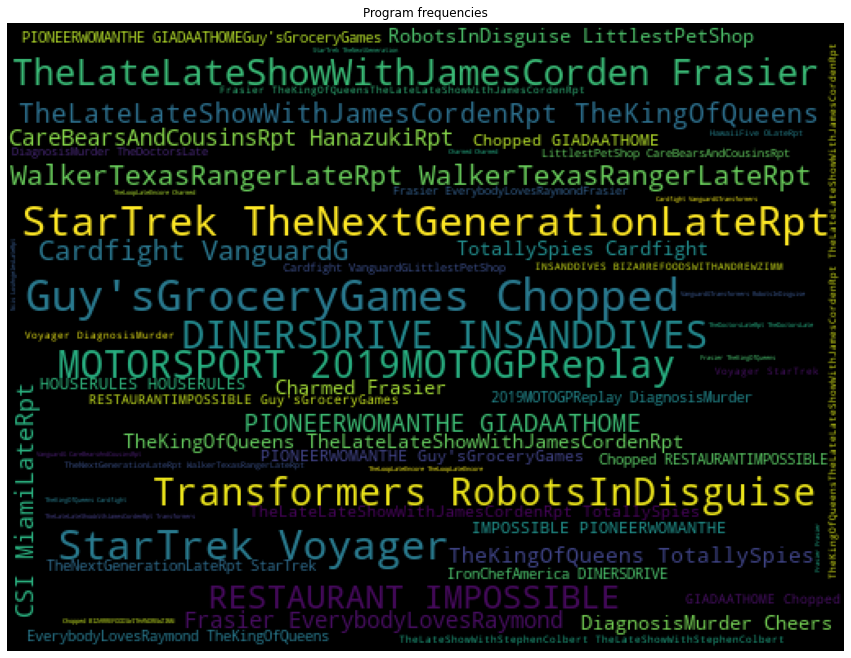

In [29]:
plt.subplots(figsize = (15,15))
wordcloud = WordCloud (background_color = 'black', width = 512, height = 384).generate(text_concat)
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.title('Program frequencies')
plt.show()

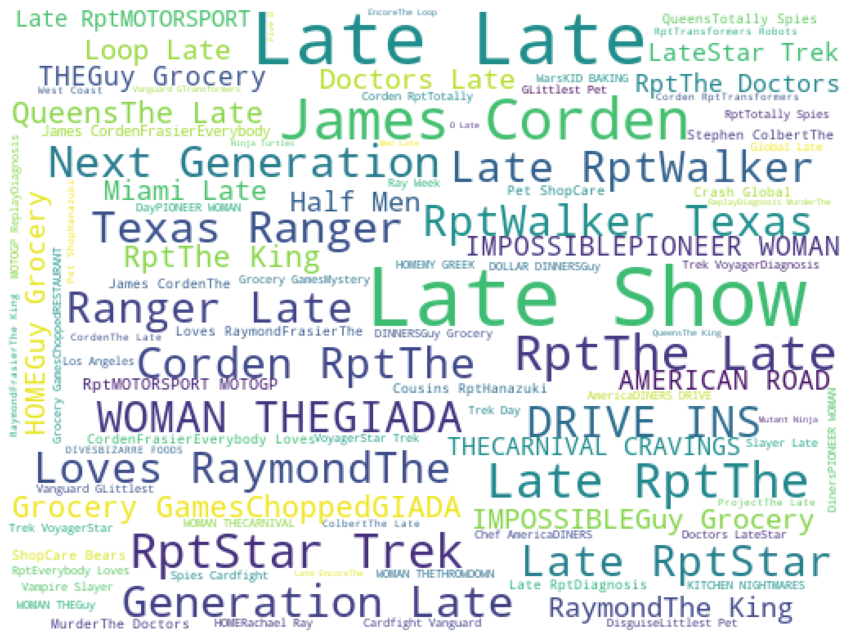

In [15]:
plt.subplots(figsize = (15,15))
stopwords = set(STOPWORDS)
stopwords.update(["of","In","With"])
wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100, width = 512\
                           , height = 384).generate(text_concat)#
plt.imshow(wordcloud_spam)
plt.axis('off')
plt.show()

## Sankey diagram

In [17]:
df_sn=pd.read_excel("C:\\Users\\jainulm.abedin\\Task files\\Data Story Telling\\Autumns 2021\\Datasets\\Session6\\data sankey.xlsx")

In [30]:
df_sn.head()

User         Source        Target  value
0  U00957  Google Search  app_complete     49
1  U00950  Google Search         refer      6
2  U00806  Google Search          home     18
3  U01049  Google Search         refer     22
4  U01033  Google Search         refer     10

In [18]:
all_nodes = df_sn.Source.values.tolist() + df_sn.Target.values.tolist() # creating nodes list, with source & target
source_indices = [all_nodes.index(sr) for sr in df_sn.Source] # creting list of source indices
target_indices = [all_nodes.index(tr) for tr in df_sn.Target]# creting list of target indices
colors = px.colors.qualitative.D3 
node_colors = [np.random.choice(colors) for node in all_nodes]

In [20]:
fig = go.Figure(data=[go.Sankey(
    # Defining nodes
    node = dict(
      label =  all_nodes,
      color =  "red"
    ),

    # Adding links
    link = dict(
      source =  source_indices,
      target =  target_indices,
      value =  df_sn.value,
))])

fig.update_layout(title_text="User journey",title_x=0.5, font_size=10)
fig.show()

## Chord diagram

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
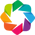

In [21]:
import holoviews as hv
from holoviews import opts, dim
from bokeh.plotting import show, output_file
hv.extension('bokeh')

In [22]:
ddf=df_sn[['Source', 'Target', 'value']]
target_channel = list(set(ddf["Target"].unique().tolist())) # creating a list of targets
journey_data = hv.Dataset(pd.DataFrame(target_channel, columns=["Digital_Media"])) # creating holoviews data object

In [23]:
## Styling the graph
%%opts Chord [height=800 width=800 title="User Journey" labels="Digital_Media" bgcolor="grey"]
%%opts Chord (node_color="Digital_Media" node_cmap="Category20" edge_color="Source" edge_cmap='Category20' edge_alpha=0.8)
%%opts Chord (edge_line_width=3 node_size=25 label_text_color="black")

hv.Chord((ddf, journey_data))

:Chord   [Source,Target]   (value)